In [230]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, f1_score, r2_score,roc_auc_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
import catboost as cb
from catboost import CatBoostClassifier, Pool, CatBoostRegressor
from category_encoders import TargetEncoder
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
import shap

In [231]:
filepath = "/Users/irisvirus/Desktop/Becode/Python/Projects/Regression/regression/properties_data_cleaned_05_12_14H30.csv"
income_data = "/Users/irisvirus/Desktop/Becode/Python/Projects/Regression/regression/INCOME DATA 2022.csv"
poverty_data = "/Users/irisvirus/Desktop/Becode/Python/Projects/Regression/regression/POVERTY RISK DATA.csv"
zipcode = "/Users/irisvirus/Desktop/Becode/Python/Projects/Regression/regression/BELGIUM/zipcodes_num_nl_new_Tumi.xls"
id = pd.read_csv(income_data)
povd = pd.read_csv(poverty_data)
df = pd.read_csv(filepath)
zcode = pd.read_excel(zipcode)


In [228]:
print(zcode.columns)


Index(['Postcode', 'NAME', 'SUBMUNICIPALITY', 'MAIN MUNICIPALITY',
       'Provincie'],
      dtype='object')


In [140]:
df

,bedrooms,property_type,locality,postal_code,kitchen,facades,price,furnished,terraceSurface,fireplace,buildingState,gardenSurface,pool,livingArea,surfaceOfThePlot,energy_certificate,province,buildingStateLabel
0,1.0,APARTMENT,ANTWERPEN,2020.0,0.0,3.0,169000.0,0.0,2.0,0.0,TO_RENOVATE,0.0,0.0,70.0,NaN,D,Antwerp,NaN
1,2.0,APARTMENT,Ixelles,1050.0,1.0,2.0,335000.0,0.0,0.0,0.0,GOOD,0.0,0.0,81.0,NaN,F,Brussels,NaN
2,1.0,APARTMENT,DEURNE,2100.0,1.0,2.0,239000.0,0.0,0.0,0.0,GOOD,45.0,0.0,88.0,NaN,D,Antwerp,NaN
3,2.0,APARTMENT,Uccle,1180.0,1.0,2.0,239000.0,0.0,10.0,0.0,TO_BE_DONE_UP,0.0,0.0,76.0,NaN,D,Brussels,NaN
4,4.0,HOUSE,Kluisbergen,9690.0,0.0,2.0,239000.0,0.0,0.0,0.0,GOOD,0.0,0.0,172.0,510.0,C,East Flanders,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15346,3.0,APARTMENT,Knokke-Heist,8300.0,0.0,NaN,1351500.0,0.0,32.0,0.0,AS_NEW,97.0,0.0,129.0,NaN,NaN,West Flanders,NaN
15347,1.0,HOUSE,Mariembourg,5660.0,1.0,4.0,125000.0,0.0,30.0,0.0,NaN,0.0,0.0,64.0,653.0,D,Namur,NaN
15348,4.0,HOUSE,Denderleeuw,9470.0,0.0,3.0,255000.0,0.0,0.0,0.0,NaN,90.0,0.0,174.0,200.0,NaN,East Flanders,NaN
15349,3.0,HOUSE,Knesselare,9910.0,0.0,4.0,429544.0,0.0,0.0,0.0,GOOD,0.0,0.0,190.0,320.0,NaN,East Flanders,NaN


In [141]:
#Clean Income Data
id_new_header = ["Locality", "min_median_income", "unnamed", "max_median_income", "locality"]
id.columns = id_new_header
id = id.drop(columns=["Locality", "unnamed"])

In [142]:
id.head()

,min_median_income,max_median_income,locality
0,23.986,51.2609 4.3695,Antwerp
1,30.579,51.1605 4.5105,Boechout
2,25.936,51.0937 4.3731,Boom
3,26.591,51.1915 4.488,Borsbeek
4,29.869,51.31 4.4995,Brasschaat


In [143]:
id.shape

(579, 3)

In [144]:
#rename columns from bpPost
zcode = zcode.rename(columns={'Localité': 'locality'})

In [145]:
zcode.head()

,Postcode,NAME,SUBMUNICIPALITY,MAIN MUNICIPALITY,Provincie
0,2040,Berendrecht,Ja,ANTWERPEN,ANTWERPEN
1,2040,Lillo,Ja,ANTWERPEN,ANTWERPEN
2,2040,Zandvliet,Ja,ANTWERPEN,ANTWERPEN
3,2070,Burcht,Ja,ZWIJNDRECHT,ANTWERPEN
4,2100,Deurne,Ja,ANTWERPEN,ANTWERPEN


In [229]:
print(zcode.columns)


Index(['Postcode', 'NAME', 'SUBMUNICIPALITY', 'MAIN MUNICIPALITY',
       'Provincie'],
      dtype='object')


In [146]:
#Change bpost postal code column names
zcode.rename(columns={'Postcode': 'postal_code', 'Provincie': 'province','NAME':'locality','MAIN MUNICIPALITY':"municipality"}, inplace=True)


In [147]:
zcode.head()

,postal_code,locality,SUBMUNICIPALITY,municipality,province
0,2040,Berendrecht,Ja,ANTWERPEN,ANTWERPEN
1,2040,Lillo,Ja,ANTWERPEN,ANTWERPEN
2,2040,Zandvliet,Ja,ANTWERPEN,ANTWERPEN
3,2070,Burcht,Ja,ZWIJNDRECHT,ANTWERPEN
4,2100,Deurne,Ja,ANTWERPEN,ANTWERPEN


In [148]:
zcode

,postal_code,locality,SUBMUNICIPALITY,municipality,province
0,2040,Berendrecht,Ja,ANTWERPEN,ANTWERPEN
1,2040,Lillo,Ja,ANTWERPEN,ANTWERPEN
2,2040,Zandvliet,Ja,ANTWERPEN,ANTWERPEN
3,2070,Burcht,Ja,ZWIJNDRECHT,ANTWERPEN
4,2100,Deurne,Ja,ANTWERPEN,ANTWERPEN
...,...,...,...,...,...
2716,8930,Menen,Neen,MENEN,WEST-VLAANDEREN
2717,8940,Wervik,Neen,WERVIK,WEST-VLAANDEREN
2718,8957,Mesen,Neen,MESEN,WEST-VLAANDEREN
2719,8970,Poperinge,Neen,POPERINGE,WEST-VLAANDEREN


In [149]:
id["postal_code"] = None
id["province"] = None

In [151]:
#Format data types between bpost dataset and Income data
zcode.province = zcode["province"].astype(str)
zcode.locality = zcode["locality"].astype(str)
zcode.municipality = zcode["municipality"].astype(str)
zcode.province = zcode.province.apply(lambda x: x.strip().lower())
zcode.locality = zcode.locality.apply(lambda x: x.strip().lower())
zcode.municipality = zcode.municipality.apply(lambda x: x.strip().lower())
id.locality = id.locality.apply(lambda x: x.strip().lower())
id.locality = id["locality"].astype(str)

In [152]:
zcode.head()

,postal_code,locality,SUBMUNICIPALITY,municipality,province
0,2040,berendrecht,Ja,antwerpen,antwerpen
1,2040,lillo,Ja,antwerpen,antwerpen
2,2040,zandvliet,Ja,antwerpen,antwerpen
3,2070,burcht,Ja,zwijndrecht,antwerpen
4,2100,deurne,Ja,antwerpen,antwerpen


In [153]:
id.columns

Index(['min_median_income', 'max_median_income', 'locality', 'postal_code',
       'province'],
      dtype='object')

In [154]:
#Change Income data column names
id.rename(columns={'max_median_income': 'gps_coordinates', "min_median_income" : "median_income"}, inplace=True)
id

,median_income,gps_coordinates,locality,postal_code,province
0,23.986,51.2609 4.3695,antwerp,None,None
1,30.579,51.1605 4.5105,boechout,None,None
2,25.936,51.0937 4.3731,boom,None,None
3,26.591,51.1915 4.488,borsbeek,None,None
4,29.869,51.31 4.4995,brasschaat,None,None
...,...,...,...,...,...
574,25.033,50.151 4.759,doische,None,None
575,26.334,50.2605 4.5675,florennes,None,None
576,25.695,50.161 4.546,philippeville,None,None
577,27.975,50.2725 4.4555,walcourt,None,None


In [155]:
id[['latitude', 'longitude']] = id['gps_coordinates'].str.split(expand=True).astype(float)

In [156]:
id = id.drop(columns="gps_coordinates")

In [157]:
id

,median_income,locality,postal_code,province,latitude,longitude
0,23.986,antwerp,None,None,51.2609,4.3695
1,30.579,boechout,None,None,51.1605,4.5105
2,25.936,boom,None,None,51.0937,4.3731
3,26.591,borsbeek,None,None,51.1915,4.4880
4,29.869,brasschaat,None,None,51.3100,4.4995
...,...,...,...,...,...,...
574,25.033,doische,None,None,50.1510,4.7590
575,26.334,florennes,None,None,50.2605,4.5675
576,25.695,philippeville,None,None,50.1610,4.5460
577,27.975,walcourt,None,None,50.2725,4.4555


In [158]:
for index, row in id.iterrows():
    # Normalize the 'locality' column in both DataFrames
    id_locality = row['locality'].strip().lower() if isinstance(row['locality'], str) else ''
    zcode['normalized_locality'] = zcode['locality'].apply(lambda x: x.strip().lower() if isinstance(x, str) else '')
    
    # Find matching rows based on normalized 'locality'
    matching_row = zcode[zcode['normalized_locality'] == id_locality]


    
    if not matching_row.empty:
        # Copy relevant data from matching_row to id
        id.at[index, 'postal_code'] = matching_row['postal_code'].values[0]
        id.at[index, 'province'] = matching_row['province'].values[0]
        id.at[index, 'new_column'] = 'Match Found'
    else:
        # Add a flag if no match is found
        id.at[index, 'new_column'] = 'No Match'

print(id)


     median_income       locality postal_code   province  latitude  longitude  \
0           23.986        antwerp        None       None   51.2609     4.3695   
1           30.579       boechout        2530  antwerpen   51.1605     4.5105   
2           25.936           boom        2850  antwerpen   51.0937     4.3731   
3           26.591       borsbeek        2150  antwerpen   51.1915     4.4880   
4           29.869     brasschaat        2930  antwerpen   51.3100     4.4995   
..             ...            ...         ...        ...       ...        ...   
574         25.033        doische        5680      namen   50.1510     4.7590   
575         26.334      florennes        5620      namen   50.2605     4.5675   
576         25.695  philippeville        5600      namen   50.1610     4.5460   
577         27.975       walcourt        5650      namen   50.2725     4.4555   
578         23.930      viroinval        None       None   50.0500     4.6240   

      new_column  
0       

In [159]:
df.locality
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15351 entries, 0 to 15350
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            15351 non-null  float64
 1   property_type       15351 non-null  object 
 2   locality            15351 non-null  object 
 3   postal_code         15351 non-null  float64
 4   kitchen             15351 non-null  float64
 5   facades             11178 non-null  float64
 6   price               15351 non-null  float64
 7   furnished           15351 non-null  float64
 8   terraceSurface      15351 non-null  float64
 9   fireplace           15351 non-null  float64
 10  buildingState       12762 non-null  object 
 11  gardenSurface       15351 non-null  float64
 12  pool                15351 non-null  float64
 13  livingArea          15351 non-null  float64
 14  surfaceOfThePlot    8285 non-null   float64
 15  energy_certificate  14332 non-null  object 
 16  prov

In [160]:
# Merge datasets on locality
merged_df = id.merge(zcode, on=['locality','postal_code'], how='left')
id.head(20)


,median_income,locality,postal_code,province,latitude,longitude,new_column
0,23.986,antwerp,None,None,51.2609,4.3695,No Match
1,30.579,boechout,2530,antwerpen,51.1605,4.5105,Match Found
2,25.936,boom,2850,antwerpen,51.0937,4.3731,Match Found
3,26.591,borsbeek,2150,antwerpen,51.1915,4.4880,Match Found
4,29.869,brasschaat,2930,antwerpen,51.3100,4.4995,Match Found
5,30.339,brecht,2960,antwerpen,51.3290,4.5940,Match Found
6,30.055,edegem,2650,antwerpen,51.1590,4.4305,Match Found
7,28.732,essen,2910,antwerpen,51.4485,4.4635,Match Found
8,28.673,hemiksem,2620,antwerpen,51.1455,4.3405,Match Found
9,32.455,hove,2540,antwerpen,51.1474,4.4820,Match Found


In [161]:
id.loc[0, 'province'] = 'antwerp'
id.loc[0, 'postal_code'] = 2000
id.loc[0]

median_income      23.986
locality          antwerp
postal_code          2000
province          antwerp
latitude          51.2609
longitude          4.3695
new_column       No Match
Name: 0, dtype: object

In [162]:
id.postal_code.isna().sum()

101

In [163]:
id = id.fillna(value=np.nan)

/var/folders/q0/n2m_wdk56vqcbt6h62ljwtjc0000gn/T/ipykernel_1082/1019745166.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  id = id.fillna(value=np.nan)


In [164]:
id['postal_code'] = pd.to_numeric(id['postal_code'], errors='coerce').fillna(0).astype(int)


In [165]:
id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median_income  579 non-null    float64
 1   locality       579 non-null    object 
 2   postal_code    579 non-null    int64  
 3   province       478 non-null    object 
 4   latitude       579 non-null    float64
 5   longitude      579 non-null    float64
 6   new_column     579 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 31.8+ KB


In [166]:
missing_rows = id[id["postal_code"].isna()].index
print(missing_rows)


Index([], dtype='int64')


In [167]:
id.isna().sum()

median_income      0
locality           0
postal_code        0
province         101
latitude           0
longitude          0
new_column         0
dtype: int64

In [168]:
municipalities = id["locality"].unique().tolist()
print((municipalities))

['antwerp', 'boechout', 'boom', 'borsbeek', 'brasschaat', 'brecht', 'edegem', 'essen', 'hemiksem', 'hove', 'kalmthout', 'kapellen', 'kontich', 'lint', 'mortsel', 'niel', 'ranst', 'rumst', 'schelle', 'schilde', 'schoten', 'stabroek', 'wijnegem', 'wommelgem', 'wuustwezel', 'zandhoven', 'zoersel', 'zwijndrecht', 'malle', 'berlaar', 'bonheiden', 'bornem', 'duffel', 'heist-op-den-berg', 'lier', 'mechelen', 'nijlen', 'putte', 'sint-katelijne-waver', 'willebroek', 'puurs-sint-amands', 'arendonk', 'baarle-hertog', 'balen', 'beerse', 'dessel', 'geel', 'grobbendonk', 'herentals', 'herenthout', 'herselt', 'hoogstraten', 'hulshout', 'kasterlee', 'lille', 'meerhout', 'merksplas', 'mol', 'olen', 'oud-turnhout', 'ravels', 'retie', 'rijkevorsel', 'turnhout', 'vorselaar', 'vosselaar', 'westerlo', 'laakdal', 'anderlecht', 'oudergem', 'sint-agatha-berchem', 'brussels', 'etterbeek', 'evere', 'vorst', 'ganshoren', 'elsene', 'jette', 'koekelberg', 'sint-jans-molenbeek', 'sint-gillis', 'sint-joost-ten-node',

In [169]:
locality_count = (df.groupby("locality")["locality"].agg("count")).sort_values(ascending=False)
locality_count



locality
Knokke-Heist                512
Antwerpen                   338
Oostende                    310
Gent                        261
Knokke                      260
                           ... 
Dilbeek Groot-Bijgaarden      1
Dilbeek Itterbeek             1
Dilbeek Schepdaal             1
Moerkerke                     1
‘s Gravenwezel Schilde        1
Name: locality, Length: 2188, dtype: int64

In [170]:
df

,bedrooms,property_type,locality,postal_code,kitchen,facades,price,furnished,terraceSurface,fireplace,buildingState,gardenSurface,pool,livingArea,surfaceOfThePlot,energy_certificate,province,buildingStateLabel
0,1.0,APARTMENT,ANTWERPEN,2020.0,0.0,3.0,169000.0,0.0,2.0,0.0,TO_RENOVATE,0.0,0.0,70.0,NaN,D,Antwerp,NaN
1,2.0,APARTMENT,Ixelles,1050.0,1.0,2.0,335000.0,0.0,0.0,0.0,GOOD,0.0,0.0,81.0,NaN,F,Brussels,NaN
2,1.0,APARTMENT,DEURNE,2100.0,1.0,2.0,239000.0,0.0,0.0,0.0,GOOD,45.0,0.0,88.0,NaN,D,Antwerp,NaN
3,2.0,APARTMENT,Uccle,1180.0,1.0,2.0,239000.0,0.0,10.0,0.0,TO_BE_DONE_UP,0.0,0.0,76.0,NaN,D,Brussels,NaN
4,4.0,HOUSE,Kluisbergen,9690.0,0.0,2.0,239000.0,0.0,0.0,0.0,GOOD,0.0,0.0,172.0,510.0,C,East Flanders,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15346,3.0,APARTMENT,Knokke-Heist,8300.0,0.0,NaN,1351500.0,0.0,32.0,0.0,AS_NEW,97.0,0.0,129.0,NaN,NaN,West Flanders,NaN
15347,1.0,HOUSE,Mariembourg,5660.0,1.0,4.0,125000.0,0.0,30.0,0.0,NaN,0.0,0.0,64.0,653.0,D,Namur,NaN
15348,4.0,HOUSE,Denderleeuw,9470.0,0.0,3.0,255000.0,0.0,0.0,0.0,NaN,90.0,0.0,174.0,200.0,NaN,East Flanders,NaN
15349,3.0,HOUSE,Knesselare,9910.0,0.0,4.0,429544.0,0.0,0.0,0.0,GOOD,0.0,0.0,190.0,320.0,NaN,East Flanders,NaN


In [171]:
len(locality_count[locality_count<10])

1846

In [172]:
df.shape

(15351, 18)

In [173]:
df.columns

Index(['bedrooms', 'property_type', 'locality', 'postal_code', 'kitchen',
       'facades', 'price', 'furnished', 'terraceSurface', 'fireplace',
       'buildingState', 'gardenSurface', 'pool', 'livingArea',
       'surfaceOfThePlot', 'energy_certificate', 'province',
       'buildingStateLabel'],
      dtype='object')

In [174]:
df.describe()

,bedrooms,postal_code,kitchen,facades,price,furnished,terraceSurface,fireplace,gardenSurface,pool,livingArea,surfaceOfThePlot,buildingStateLabel
count,15351.000000,15351.000000,15351.000000,11178.000000,1.535100e+04,15351.000000,15351.000000,15351.000000,15351.000000,15351.000000,15351.000000,8285.000000,0.0
mean,2.831542,5286.972640,0.636636,2.859367,4.636028e+05,0.038760,9.520292,0.046381,135.418344,0.029314,163.924239,1167.814243,NaN
std,1.277272,3250.243258,0.480984,0.874158,4.469836e+05,0.193028,40.280746,0.210316,745.792476,0.168691,128.329672,3518.704472,NaN
min,0.000000,1000.000000,0.000000,1.000000,4.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,NaN
25%,2.000000,2170.000000,0.000000,2.000000,2.490000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,92.000000,237.000000,NaN
50%,3.000000,4300.000000,1.000000,3.000000,3.490000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,529.000000,NaN
75%,4.000000,8530.000000,1.000000,4.000000,4.990000e+05,0.000000,10.000000,0.000000,0.000000,0.000000,200.000000,1045.000000,NaN
max,9.000000,9992.000000,1.000000,9.000000,8.900000e+06,1.000000,3749.000000,1.000000,38690.000000,1.000000,7515.000000,160737.000000,NaN


In [175]:
# Get the value counts of the 'locality' column
value_counts = df["locality"].value_counts()

# Filter values that occur more than 30 times
filtered_values = value_counts[value_counts > 30].index
value_counts.min()


1

In [38]:
df["locality"] = df[df["locality"].isin(filtered_values)]

ValueError: Columns must be same length as key

In [176]:
df = df[df['price'] <= 5000000]

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from scipy import stats


#Additional data cleaning and renaming
df = df[df['price'] <= 5000000]
df = df[df['price'] >= 40000]
df = df[df['bedrooms'] <= 9]


df['buildingState'] = df['buildingState'].replace({
    'AS_NEW': 1,
    'JUST_RENOVATED': 2,
    'GOOD': 3,
    'TO_RESTORE': 4,
    'TO_RENOVATE': 4,
    'TO_BE_DONE_UP':4
})


#print(df['buildingState'].nunique())
#print(df['buildingState'].unique())
#df["locality"] = df[["locality"].value_counts()] > 30

df['province'] = df['province'].replace({'flemish_brabant_extended': 'flemish_brabant', 'hainaut_extended': 'hainaut_province'})
df['province'] = df['province'].replace({'flemish_brabant': 'Flemish Brabant', 'hainaut_province': 'Hainaut', 'antwerp_province': 'Antwerp', 'brussels_capital': 'Brussels', 
                                         'limburg_province': 'Limburg', 'liège_province': 'Liège', 'luxembourg_province': 'Luxembourg', 'namur_province': 'Namur', 
                                         'walloon_brabant': 'Walloon Brabant', 'west_flanders': 'West Flanders','east_flanders': 'East Flanders'})
#print(df['province'].nunique())
#print(df['province'].unique())


#Number of rows and columns and useless columns dropped
rows, columns = df.shape
table = PrettyTable()
table.field_names = ["Axis", "Count"]
table.add_row(["Number of Rows", rows])
table.add_row(["Number of Columns", columns])
print(table)


#NaN counts before changes
nan_count = df.isna().sum()
total_rows = len(df)
table = PrettyTable()
table.field_names = ["Column Name", "NaN Count", "NaN Percentage"]
for column_name in nan_count.index:
    nan_percentage = (nan_count[column_name] / total_rows) * 100
    table.add_row([column_name, nan_count[column_name], f"{nan_percentage:.2f}%"])
print(table)

#Cleaning
columns_to_replace = ['terraceSurface']
df[columns_to_replace] = df[columns_to_replace].fillna(0)
df = df.dropna(subset=['livingArea',"energy_certificate"])
df = df.drop(['buildingStateLabel'], axis=1)

#Summary after changes
rows, columns = df.shape
table = PrettyTable()
table.field_names = ["Axis", "Count"]
table.add_row(["Number of Rows", rows])
table.add_row(["Number of Columns", columns])
print(table)

nan_count = df.isna().sum()
total_rows = len(df)
table = PrettyTable()
table.field_names = ["Column Name", "NaN Count", "NaN Percentage"]
for column_name in nan_count.index:
    nan_percentage = (nan_count[column_name] / total_rows) * 100
    table.add_row([column_name, nan_count[column_name], f"{nan_percentage:.2f}%"])
print(table)


+-------------------+-------+
|        Axis       | Count |
+-------------------+-------+
|   Number of Rows  | 15337 |
| Number of Columns |   18  |
+-------------------+-------+
+--------------------+-----------+----------------+
|    Column Name     | NaN Count | NaN Percentage |
+--------------------+-----------+----------------+
|      bedrooms      |     0     |     0.00%      |
|   property_type    |     0     |     0.00%      |
|      locality      |     0     |     0.00%      |
|    postal_code     |     0     |     0.00%      |
|      kitchen       |     0     |     0.00%      |
|      facades       |    4172   |     27.20%     |
|       price        |     0     |     0.00%      |
|     furnished      |     0     |     0.00%      |
|   terraceSurface   |     0     |     0.00%      |
|     fireplace      |     0     |     0.00%      |
|   buildingState    |    2589   |     16.88%     |
|   gardenSurface    |     0     |     0.00%      |
|        pool        |     0     |     0

/var/folders/q0/n2m_wdk56vqcbt6h62ljwtjc0000gn/T/ipykernel_1082/1105535692.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['buildingState'] = df['buildingState'].replace({


In [178]:
df.locality

0               ANTWERPEN
1                 Ixelles
2                  DEURNE
3                   Uccle
4             Kluisbergen
               ...       
15342    Bassilly (Silly)
15343            Sprimont
15344           Antwerpen
15345           Louveigné
15347         Mariembourg
Name: locality, Length: 14319, dtype: object

In [179]:
df.head()

,bedrooms,property_type,locality,postal_code,kitchen,facades,price,furnished,terraceSurface,fireplace,buildingState,gardenSurface,pool,livingArea,surfaceOfThePlot,energy_certificate,province
0,1.0,APARTMENT,ANTWERPEN,2020.0,0.0,3.0,169000.0,0.0,2.0,0.0,4.0,0.0,0.0,70.0,NaN,D,Antwerp
1,2.0,APARTMENT,Ixelles,1050.0,1.0,2.0,335000.0,0.0,0.0,0.0,3.0,0.0,0.0,81.0,NaN,F,Brussels
2,1.0,APARTMENT,DEURNE,2100.0,1.0,2.0,239000.0,0.0,0.0,0.0,3.0,45.0,0.0,88.0,NaN,D,Antwerp
3,2.0,APARTMENT,Uccle,1180.0,1.0,2.0,239000.0,0.0,10.0,0.0,4.0,0.0,0.0,76.0,NaN,D,Brussels
4,4.0,HOUSE,Kluisbergen,9690.0,0.0,2.0,239000.0,0.0,0.0,0.0,3.0,0.0,0.0,172.0,510.0,C,East Flanders


In [180]:
df.locality.unique().sum()

"ANTWERPENIxellesDEURNEUccleKluisbergenEngisDilbeekBERCHEMEDEGEMLIERPUURSAntwerpenAnsMEERDONKGent MariakerkeWortegem-PetegemTURNHOUTSaint-Josse-ten-NoodeBruxellesMORTSELWILRIJKBorgerhoutHERENTSINT-NIKLAASWoluwe-Saint-PierreAARSCHOTKAPELLE-OP-DEN-BOSDeurneTieltHerstalBORGERHOUTPELTDeerlijkGent DrongenBrakelMOLENBEEK-SAINT-JEANBRASSCHAATRonseHerzeleSaint-GillesKLUISBERGENEkerenWezembeek-OppemMERKSEMGanshorenUCCLEIXELLESGrâce-HollogneBerchemDESSELKnokke-HeistSINT-PIETERS-LEEUWAuderghemLeuvenBrusselsLiègeBouwelGentWOMMELGEMALLEURAALSTOudenaardeBrechtSerskampLochristiLangdorpBouillonLeestSINT-KATELIJNE-WAVERHARELBEKERUISBROEKWAREGEMEvereMolenbeek-Saint-JeanEtterbeekForestAnzegemKraainemLintLINTBRUXELLESLODELINSARTWETTERENKESSELFléronSint-Martens-LatemBeerzelLAKEN (BRU.)HOBOKENNielLUMMENZWIJNDRECHTOostendeVELTEM-BEISEMLaekenJetteLedebergTroozLUBBEEKEKERENNijlenSinaai-WaasHERENTALSHASSELTMECHELENWoluwe-Saint-LambertWilrijkMelleSINT-MARTENS-LATEMHoevenenHOVEHoogledeAnderlechtLEUVENBlankenberge

In [181]:
from rapidfuzz import fuzz, process
df2=df.copy()
df2["median_income"] = None


In [182]:
id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median_income  579 non-null    float64
 1   locality       579 non-null    object 
 2   postal_code    579 non-null    int64  
 3   province       478 non-null    object 
 4   latitude       579 non-null    float64
 5   longitude      579 non-null    float64
 6   new_column     579 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 31.8+ KB


In [183]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14319 entries, 0 to 15347
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            14319 non-null  float64
 1   property_type       14319 non-null  object 
 2   locality            14319 non-null  object 
 3   postal_code         14319 non-null  float64
 4   kitchen             14319 non-null  float64
 5   facades             10568 non-null  float64
 6   price               14319 non-null  float64
 7   furnished           14319 non-null  float64
 8   terraceSurface      14319 non-null  float64
 9   fireplace           14319 non-null  float64
 10  buildingState       12070 non-null  float64
 11  gardenSurface       14319 non-null  float64
 12  pool                14319 non-null  float64
 13  livingArea          14319 non-null  float64
 14  surfaceOfThePlot    7812 non-null   float64
 15  energy_certificate  14319 non-null  object 
 16  province 

In [184]:
df2["postal_code"].astype(int)

0        2020
1        1050
2        2100
3        1180
4        9690
         ... 
15342    7830
15343    4140
15344    2000
15345    4141
15347    5660
Name: postal_code, Length: 14319, dtype: int64

In [185]:
df2["locality"] = df2["locality"].str.lower().str.strip()

In [186]:
df2.locality

0               antwerpen
1                 ixelles
2                  deurne
3                   uccle
4             kluisbergen
               ...       
15342    bassilly (silly)
15343            sprimont
15344           antwerpen
15345           louveigné
15347         mariembourg
Name: locality, Length: 14319, dtype: object

In [187]:
import pandas as pd
from rapidfuzz import fuzz, process
#from fuzzywuzzy import process

def match_income(row, id, log_file="match_results.csv", unmatched_file="unmatched_results.csv"):
    """
    Match income based on postal code or locality.
    
    Priority:
    1. Exact match on postal code.
    2. Fuzzy match on locality.
    
    If no match is found, return None.
    Log each iteration to a CSV for double-checking.
    """
    # Create a dictionary to log results for this row
    log_data = {
        "postal_code": row['postal_code'],
        "locality": row['locality'],
        "province": row['province'],
        "match_type": "None",
        "matched_value": None,
        "median_income": None
    }

    # Attempt exact match on postal code
    postal_matches = id[id['postal_code'] == row['postal_code']]
    if not postal_matches.empty:
        matched_income = postal_matches['median_income'].values[0]
        log_data.update({
            "match_type": "Postal Code",
            "matched_value": row['postal_code'],
            "median_income": matched_income
        })
        append_to_log(log_data, log_file)
        return matched_income

    # Fuzzy match on locality
    best_match = process.extractOne(row['locality'], id['locality'])
    if best_match and best_match[1] > 75:  # Ensure the match score is above a threshold
        matched_locality = best_match[0]
        matched_income = id[id['locality'] == matched_locality]['median_income'].values[0]
        log_data.update({
            "match_type": "Locality",
            "matched_value": matched_locality,
            "median_income": matched_income
        })
        append_to_log(log_data, log_file)
        return matched_income

    # No match found; log to the unmatched file
    append_to_log(log_data, unmatched_file)
    return None

def append_to_log(log_data, log_file):
    """
    Append log data to the specified CSV file.
    """
    # Convert the log data dictionary to a DataFrame
    log_df = pd.DataFrame([log_data])

    # Append to the CSV file
    try:
        # If the file exists, append without writing the header
        log_df.to_csv(log_file, mode='a', index=False, header=False)
    except FileNotFoundError:
        # If the file does not exist, write with the header
        log_df.to_csv(log_file, mode='w', index=False, header=True)


In [188]:
#Apply FuzzyMatch
df2['median_income'] = df2.apply(match_income, axis=1, id=id)

In [189]:
df2.shape

(14319, 18)

In [190]:
df2

,bedrooms,property_type,locality,postal_code,kitchen,facades,price,furnished,terraceSurface,fireplace,buildingState,gardenSurface,pool,livingArea,surfaceOfThePlot,energy_certificate,province,median_income
0,1.0,APARTMENT,antwerpen,2020.0,0.0,3.0,169000.0,0.0,2.0,0.0,4.0,0.0,0.0,70.0,NaN,D,Antwerp,23.986
1,2.0,APARTMENT,ixelles,1050.0,1.0,2.0,335000.0,0.0,0.0,0.0,3.0,0.0,0.0,81.0,NaN,F,Brussels,27.238
2,1.0,APARTMENT,deurne,2100.0,1.0,2.0,239000.0,0.0,0.0,0.0,3.0,45.0,0.0,88.0,NaN,D,Antwerp,28.019
3,2.0,APARTMENT,uccle,1180.0,1.0,2.0,239000.0,0.0,10.0,0.0,4.0,0.0,0.0,76.0,NaN,D,Brussels,28.800
4,4.0,HOUSE,kluisbergen,9690.0,0.0,2.0,239000.0,0.0,0.0,0.0,3.0,0.0,0.0,172.0,510.0,C,East Flanders,29.559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15342,3.0,HOUSE,bassilly (silly),7830.0,1.0,4.0,625000.0,0.0,0.0,1.0,NaN,0.0,1.0,170.0,1881.0,A,Hainaut,NaN
15343,2.0,APARTMENT,sprimont,4140.0,1.0,2.0,150000.0,0.0,0.0,0.0,3.0,0.0,0.0,61.0,NaN,C,Liège,29.682
15344,2.0,APARTMENT,antwerpen,2000.0,1.0,2.0,198000.0,0.0,0.0,0.0,NaN,0.0,0.0,95.0,NaN,B,Antwerp,23.986
15345,2.0,APARTMENT,louveigné,4141.0,1.0,2.0,225000.0,0.0,0.0,0.0,3.0,0.0,0.0,92.0,NaN,B,Liège,NaN


In [191]:
missing_media = df2[df2["median_income"].isna()]
df3 = df2.drop(missing_media.index)


In [192]:
df3.shape

(13128, 18)

In [193]:
# Count missing values in the 'median_income' column
missing_count = df3['median_income'].isna().sum()
print(f"Missing values count: {missing_count}")

# Preview rows with missing values
missing_preview = df3[df3['median_income'].isna()]
print("Preview of missing rows:")
print(missing_preview.head())


Missing values count: 0
Preview of missing rows:
Empty DataFrame
Columns: [bedrooms, property_type, locality, postal_code, kitchen, facades, price, furnished, terraceSurface, fireplace, buildingState, gardenSurface, pool, livingArea, surfaceOfThePlot, energy_certificate, province, median_income]
Index: []


In [194]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13128 entries, 0 to 15347
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            13128 non-null  float64
 1   property_type       13128 non-null  object 
 2   locality            13128 non-null  object 
 3   postal_code         13128 non-null  float64
 4   kitchen             13128 non-null  float64
 5   facades             9664 non-null   float64
 6   price               13128 non-null  float64
 7   furnished           13128 non-null  float64
 8   terraceSurface      13128 non-null  float64
 9   fireplace           13128 non-null  float64
 10  buildingState       11083 non-null  float64
 11  gardenSurface       13128 non-null  float64
 12  pool                13128 non-null  float64
 13  livingArea          13128 non-null  float64
 14  surfaceOfThePlot    7204 non-null   float64
 15  energy_certificate  13128 non-null  object 
 16  province 

In [195]:
#Scale income price values
#Convert number formatting of median_income column
df3['median_income'] = df3['median_income'] * 1000

#make a float
df3['median_income'] = df3['median_income'].astype(float)

df3


,bedrooms,property_type,locality,postal_code,kitchen,facades,price,furnished,terraceSurface,fireplace,buildingState,gardenSurface,pool,livingArea,surfaceOfThePlot,energy_certificate,province,median_income
0,1.0,APARTMENT,antwerpen,2020.0,0.0,3.0,169000.0,0.0,2.0,0.0,4.0,0.0,0.0,70.0,NaN,D,Antwerp,23986.0
1,2.0,APARTMENT,ixelles,1050.0,1.0,2.0,335000.0,0.0,0.0,0.0,3.0,0.0,0.0,81.0,NaN,F,Brussels,27238.0
2,1.0,APARTMENT,deurne,2100.0,1.0,2.0,239000.0,0.0,0.0,0.0,3.0,45.0,0.0,88.0,NaN,D,Antwerp,28019.0
3,2.0,APARTMENT,uccle,1180.0,1.0,2.0,239000.0,0.0,10.0,0.0,4.0,0.0,0.0,76.0,NaN,D,Brussels,28800.0
4,4.0,HOUSE,kluisbergen,9690.0,0.0,2.0,239000.0,0.0,0.0,0.0,3.0,0.0,0.0,172.0,510.0,C,East Flanders,29559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15335,2.0,HOUSE,stekene,9190.0,0.0,4.0,246000.0,0.0,0.0,0.0,NaN,0.0,0.0,100.0,9151.0,C,East Flanders,29369.0
15341,5.0,HOUSE,la bruyère,5080.0,1.0,4.0,599000.0,0.0,0.0,0.0,1.0,0.0,0.0,273.0,1670.0,B,Namur,31326.0
15343,2.0,APARTMENT,sprimont,4140.0,1.0,2.0,150000.0,0.0,0.0,0.0,3.0,0.0,0.0,61.0,NaN,C,Liège,29682.0
15344,2.0,APARTMENT,antwerpen,2000.0,1.0,2.0,198000.0,0.0,0.0,0.0,NaN,0.0,0.0,95.0,NaN,B,Antwerp,23986.0


In [196]:
df3["locality"].value_counts()

locality
antwerpen                 470
knokke-heist              451
oostende                  294
gent                      286
knokke                    225
                         ... 
herzele borsbeke            1
mont sur marchienne         1
kortenberg erps-kwerps      1
weerde (zemst)              1
mariembourg                 1
Name: count, Length: 1388, dtype: int64

In [197]:
localities = []
for local in df3.locality:
    if local not in localities:
            localities.append(local)
print(len(localities), localities)


1388 ['antwerpen', 'ixelles', 'deurne', 'uccle', 'kluisbergen', 'engis', 'dilbeek', 'berchem', 'edegem', 'lier', 'puurs', 'ans', 'meerdonk', 'gent mariakerke', 'wortegem-petegem', 'turnhout', 'saint-josse-ten-noode', 'bruxelles', 'mortsel', 'borgerhout', 'herent', 'sint-niklaas', 'woluwe-saint-pierre', 'aarschot', 'kapelle-op-den-bos', 'tielt', 'herstal', 'pelt', 'deerlijk', 'gent drongen', 'brakel', 'molenbeek-saint-jean', 'brasschaat', 'ronse', 'herzele', 'saint-gilles', 'ekeren', 'wezembeek-oppem', 'ganshoren', 'grâce-hollogne', 'dessel', 'knokke-heist', 'sint-pieters-leeuw', 'auderghem', 'leuven', 'brussels', 'gent', 'wommelgem', 'aalst', 'oudenaarde', 'brecht', 'serskamp', 'lochristi', 'bouillon', 'sint-katelijne-waver', 'harelbeke', 'waregem', 'evere', 'etterbeek', 'anzegem', 'kraainem', 'lint', 'wetteren', 'kessel', 'fléron', 'sint-martens-latem', 'beerzel', 'laken (bru.)', 'niel', 'lummen', 'zwijndrecht', 'oostende', 'veltem-beisem', 'laeken', 'jette', 'ledeberg', 'trooz', 'lub

In [198]:
df3.price.max()

4875000.0

In [61]:
df.price.describe()

count    1.431900e+04
mean     4.542476e+05
std      4.056389e+05
min      4.000000e+04
25%      2.490000e+05
50%      3.490000e+05
75%      4.990000e+05
max      4.875000e+06
Name: price, dtype: float64

In [59]:
df3['log_price'] = np.log(df3['price'])
df3["log_median_income"] = np.log(df3["median_income"])

In [199]:
df3["bedrooms"]= df3["bedrooms"].astype(int)
df3["postal_code"]=df3["postal_code"].astype(int)

In [200]:
df3.province.unique()

array(['Antwerp', 'Brussels', 'East Flanders', 'Liège', 'Flemish Brabant',
       'Limburg', 'West Flanders', 'Luxembourg', 'Walloon Brabant',
       'Namur', 'Hainaut'], dtype=object)

In [201]:
flanders_provinces = ["Antwerp", "East Flanders", "Flemish Brabant", "Limburg", "West Flanders"]
wallonia_provinces = ["Liège", "Luxembourg", "Walloon Brabant", "Namur", "Hainaut"]

# Define a function to assign regions
def assign_region(province):
    if province in flanders_provinces:
        return "Flanders"
    elif province in wallonia_provinces:
        return "Wallonia"
    else:
        return "Brussels"

# Apply the function to create the region column
df3["region"] = df3["province"].apply(assign_region)

print(df3["region"].unique())


['Flanders' 'Brussels' 'Wallonia']


In [202]:
df3.head()

,bedrooms,property_type,locality,postal_code,kitchen,facades,price,furnished,terraceSurface,fireplace,buildingState,gardenSurface,pool,livingArea,surfaceOfThePlot,energy_certificate,province,median_income,region
0,1,APARTMENT,antwerpen,2020,0.0,3.0,169000.0,0.0,2.0,0.0,4.0,0.0,0.0,70.0,NaN,D,Antwerp,23986.0,Flanders
1,2,APARTMENT,ixelles,1050,1.0,2.0,335000.0,0.0,0.0,0.0,3.0,0.0,0.0,81.0,NaN,F,Brussels,27238.0,Brussels
2,1,APARTMENT,deurne,2100,1.0,2.0,239000.0,0.0,0.0,0.0,3.0,45.0,0.0,88.0,NaN,D,Antwerp,28019.0,Flanders
3,2,APARTMENT,uccle,1180,1.0,2.0,239000.0,0.0,10.0,0.0,4.0,0.0,0.0,76.0,NaN,D,Brussels,28800.0,Brussels
4,4,HOUSE,kluisbergen,9690,0.0,2.0,239000.0,0.0,0.0,0.0,3.0,0.0,0.0,172.0,510.0,C,East Flanders,29559.0,Flanders


In [139]:
#convert property type to binary
df3["property_type"] = df3["property_type"].apply(lambda item: "0" if item == "APARTMENT" else "1")
df3["property_type"] = df3["property_type"].astype(int)
df3["property_type"]


0        0
1        0
2        0
3        0
4        1
        ..
15341    1
15342    1
15343    0
15344    0
15347    1
Name: property_type, Length: 13159, dtype: int64

In [203]:
df3.columns

Index(['bedrooms', 'property_type', 'locality', 'postal_code', 'kitchen',
       'facades', 'price', 'furnished', 'terraceSurface', 'fireplace',
       'buildingState', 'gardenSurface', 'pool', 'livingArea',
       'surfaceOfThePlot', 'energy_certificate', 'province', 'median_income',
       'region'],
      dtype='object')

In [326]:
#Remove outside 5th and 95th percentile 

df3 = df3[df3['price'].between(df3['price'].quantile(0.05), df3['price'].quantile(0.95))]

In [204]:
#Remove Inter-quantile Range and adding 1.5times IQR for outliers

q1 = df3['price'].quantile(0.25)
q3 = df3['price'].quantile(0.75)
iqr = q3 - q1
df3 = df3[(df3['price'] >= q1 - 1.5 * iqr) & (df3['price'] <= q3 + 1.5 * iqr)]

In [298]:
#Remove Inter-quantile Range Generic

q1 = df3['price'].quantile(0.25)
q3 = df3['price'].quantile(0.75)
iqr = q3 - q1
df3 = df3[(df3['price'] >= q1) & (df3['price'] <= q3)]

In [268]:
#Remove rows with only one bedroom
df3 = df3[df3['bedrooms'] != 1]

In [68]:
df3.shape

(12176, 19)

In [205]:
X = df3.drop(columns=["price","kitchen","postal_code","furnished","fireplace","province","property_type"])
y = df3["price"]

In [179]:
X = df3.drop(columns=["price","kitchen","postal_code","furnished","fireplace"])
y = df3["price"]

In [206]:
X.columns

Index(['bedrooms', 'locality', 'facades', 'terraceSurface', 'buildingState',
       'gardenSurface', 'pool', 'livingArea', 'surfaceOfThePlot',
       'energy_certificate', 'median_income', 'region'],
      dtype='object')

In [442]:
from category_encoders import TargetEncoder

# Target Encoding for locality
target_encoder = TargetEncoder(cols=["locality"])
X["locality_encoded"] = target_encoder.fit_transform(X["locality"], X["median_income"])

In [207]:
X.columns

Index(['bedrooms', 'locality', 'facades', 'terraceSurface', 'buildingState',
       'gardenSurface', 'pool', 'livingArea', 'surfaceOfThePlot',
       'energy_certificate', 'median_income', 'region'],
      dtype='object')

In [208]:
X = X.drop(columns=["terraceSurface"])
X

,bedrooms,locality,facades,buildingState,gardenSurface,pool,livingArea,surfaceOfThePlot,energy_certificate,median_income,region
0,1,antwerpen,3.0,4.0,0.0,0.0,70.0,NaN,D,23986.0,Flanders
1,2,ixelles,2.0,3.0,0.0,0.0,81.0,NaN,F,27238.0,Brussels
2,1,deurne,2.0,3.0,45.0,0.0,88.0,NaN,D,28019.0,Flanders
3,2,uccle,2.0,4.0,0.0,0.0,76.0,NaN,D,28800.0,Brussels
4,4,kluisbergen,2.0,3.0,0.0,0.0,172.0,510.0,C,29559.0,Flanders
...,...,...,...,...,...,...,...,...,...,...,...
15335,2,stekene,4.0,NaN,0.0,0.0,100.0,9151.0,C,29369.0,Flanders
15341,5,la bruyère,4.0,1.0,0.0,0.0,273.0,1670.0,B,31326.0,Wallonia
15343,2,sprimont,2.0,3.0,0.0,0.0,61.0,NaN,C,29682.0,Wallonia
15344,2,antwerpen,2.0,NaN,0.0,0.0,95.0,NaN,B,23986.0,Flanders


In [209]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [210]:
X.columns

Index(['bedrooms', 'locality', 'facades', 'buildingState', 'gardenSurface',
       'pool', 'livingArea', 'surfaceOfThePlot', 'energy_certificate',
       'median_income', 'region'],
      dtype='object')

In [211]:
X.dtypes

bedrooms                int64
locality               object
facades               float64
buildingState         float64
gardenSurface         float64
pool                  float64
livingArea            float64
surfaceOfThePlot      float64
energy_certificate     object
median_income         float64
region                 object
dtype: object

In [848]:
X["locality_encoded"].dtype

dtype('float64')

In [212]:
categorical_feature_indices = ["locality","energy_certificate","region"]

In [77]:
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor, Pool
from sklearn import metrics

In [213]:
kf = KFold(n_splits=5,shuffle=True, random_state=42)
feature_importances = []

In [372]:
param_dist = {
    "iterations": [500, 1000, 1500],
    "learning_rate": np.linspace(0.01, 0.3, 10),
    "depth": [4, 6, 8, 10],
    "l2_leaf_reg": [1, 3, 5, 7, 9],
    "random_strength": [1, 2, 5, 10],
}

In [373]:
model = CatBoostRegressor(cat_features=categorical_feature_indices, verbose=0)

# Randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    scoring="neg_mean_squared_error",
    cv=kf,
    verbose=3,
    random_state=42,
    n_jobs=-1,
)

# Fit randomized search on training data
random_search.fit(X, y)

# Retrieve the best parameters and model
best_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Parameters Found:", best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}, Mean Squared Error: {mse:.2f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 3/5] END depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.10666666666666666, random_strength=5;, score=-7875695315.949 total time=  14.7s
[CV 1/5] END depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.10666666666666666, random_strength=5;, score=-7607484795.023 total time=  14.7s
[CV 2/5] END depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.10666666666666666, random_strength=5;, score=-8139005991.024 total time=  14.8s
[CV 3/5] END depth=6, iterations=1000, l2_leaf_reg=3, learning_rate=0.1711111111111111, random_strength=1;, score=-7695482322.622 total time=  19.8s
[CV 1/5] END depth=6, iterations=1000, l2_leaf_reg=3, learning_rate=0.1711111111111111, random_strength=1;, score=-7567085596.749 total time=  19.9s
[CV 5/5] END depth=6, iterations=1000, l2_leaf_reg=3, learning_rate=0.1711111111111111, random_strength=1;, score=-7822439158.272 total time=  19.9s
[CV 4/5] END depth=6, iterations=1000, l2_le

/Users/irisvirus/Desktop/Becode/Python/Projects/Regression/venv_immo/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters Found: {'random_strength': 5, 'learning_rate': 0.07444444444444444, 'l2_leaf_reg': 7, 'iterations': 1500, 'depth': 6}
Root Mean Squared Error: 72402.59, Mean Squared Error: 5242135348.58


In [75]:
best_params = {
    "iterations": 1000,
    "learning_rate": 0.1,
    "depth": 8,
    "l2_leaf_reg": 5,
    "random_strength": 2,
    "cat_features": categorical_feature_indices
}
model = CatBoostRegressor(**best_params, verbose=100)
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100, verbose=100)

0:	learn: 371296.4892721	test: 392234.6409205	best: 392234.6409205 (0)	total: 72ms	remaining: 1m 11s
100:	learn: 191338.8455524	test: 230139.8394207	best: 230138.8663655 (99)	total: 1.15s	remaining: 10.3s
200:	learn: 166386.1931159	test: 227372.8988193	best: 227066.4485174 (169)	total: 2.05s	remaining: 8.16s
300:	learn: 149267.5246079	test: 225869.9192651	best: 225648.1371130 (285)	total: 2.83s	remaining: 6.57s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 225648.1371
bestIteration = 285

Shrink model to first 286 iterations.


In [336]:
#BEST PARAMETERS LINEAR
best_params = {
    "random_strength": 10,
    "learning_rate": 0.10666666666666666,
    "l2_leaf_reg": 5,
    "iterations": 1500,
    "depth": 6,
    "eval_metric": "RMSE",
    "verbose": 100,  # Adjust verbosity to see training progress
    "random_seed": 42,
    "cat_features": categorical_feature_indices
}

# Initialize the CatBoost model
model = CatBoostRegressor(**best_params)

# Train the model
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)

# Print metrics
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")

0:	learn: 187886.2976990	test: 183934.8947775	best: 183934.8947775 (0)	total: 8.05ms	remaining: 12.1s
100:	learn: 112746.7727169	test: 108714.3318334	best: 108714.3318334 (100)	total: 507ms	remaining: 7.02s
200:	learn: 99876.2733342	test: 99881.4110927	best: 99877.9635841 (199)	total: 942ms	remaining: 6.09s
300:	learn: 94674.6922800	test: 98283.0011858	best: 98283.0011858 (300)	total: 1.6s	remaining: 6.39s
400:	learn: 91349.6792084	test: 97586.8194471	best: 97586.8194471 (400)	total: 2.16s	remaining: 5.92s
500:	learn: 88524.9524901	test: 97021.1034334	best: 96984.0389836 (498)	total: 2.73s	remaining: 5.44s
600:	learn: 85881.1285194	test: 96624.2837088	best: 96624.2837088 (600)	total: 3.21s	remaining: 4.8s
700:	learn: 83394.8820850	test: 96574.0145141	best: 96502.4125616 (672)	total: 3.64s	remaining: 4.15s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 96502.41256
bestIteration = 672

Shrink model to first 673 iterations.
Root Mean Squared Error (RMSE): 96,502.41
Mean

In [214]:
#BEST PARAMETERS LINEAR 95th Percentile
best_params = {
    "random_strength": 5,
    "learning_rate": 0.07444444444444444,
    "l2_leaf_reg": 7,
    "iterations": 1500,
    "depth": 6,
    "eval_metric": "RMSE",
    "verbose": 100,  # Adjust verbosity to see training progress
    "random_seed": 42,
    "cat_features": categorical_feature_indices
}

# Initialize the CatBoost model
model = CatBoostRegressor(**best_params)

# Train the model
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)

# Print metrics
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")

0:	learn: 170097.8902330	test: 170647.7142328	best: 170647.7142328 (0)	total: 13.3ms	remaining: 19.9s
100:	learn: 100014.0271265	test: 99423.6094584	best: 99423.6094584 (100)	total: 480ms	remaining: 6.64s
200:	learn: 92297.1742244	test: 94119.4958329	best: 94119.4958329 (200)	total: 1.1s	remaining: 7.11s
300:	learn: 88212.2124303	test: 91625.7347448	best: 91625.7347448 (300)	total: 1.78s	remaining: 7.08s
400:	learn: 85261.7192835	test: 89936.0723332	best: 89927.9263834 (398)	total: 2.23s	remaining: 6.1s
500:	learn: 83048.3597847	test: 89134.2347040	best: 89134.2347040 (500)	total: 2.7s	remaining: 5.38s
600:	learn: 81030.6387558	test: 88400.1639004	best: 88396.3863496 (599)	total: 3.15s	remaining: 4.72s
700:	learn: 79107.2499433	test: 87853.9594721	best: 87853.9594721 (700)	total: 3.6s	remaining: 4.11s
800:	learn: 77465.8211725	test: 87493.3238421	best: 87491.9481087 (790)	total: 4.08s	remaining: 3.56s
900:	learn: 75871.9767537	test: 87140.9142820	best: 87138.5625002 (898)	total: 4.5s	r

In [215]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
#y_pred_linear = np.exp(y_test_pred)
feature_importances.append(model.get_feature_importance())


Performing SHAP analysis...
Generating SHAP summary plot...


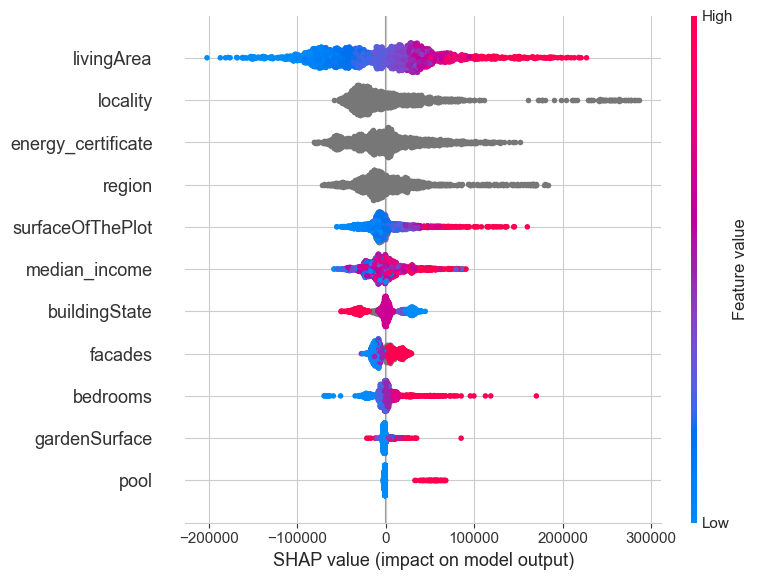

In [217]:
#NEW SHAP TEST
import shap 
# Ensure categorical features are properly handled
categorical_feature_indices = [X_test.columns.get_loc(col) for col in ["locality","energy_certificate","region"]]

# Create Pool with explicit categorical feature indices
test_pool = Pool(
    X_test, 
    y_test, 
    cat_features=categorical_feature_indices
)

# SHAP analysis
print("\nPerforming SHAP analysis...")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Generate SHAP summary plot
print("Generating SHAP summary plot...")
shap.summary_plot(shap_values, X_test)

# SHAP dependence plot for a specific feature
specific_feature = "price"  # Replace with your feature of interest
if specific_feature in X_test.columns:
    print(f"Generating SHAP dependence plot for {specific_feature}...")
    shap.dependence_plot(specific_feature, shap_values, X_test)

In [218]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap # type: ignore
import numpy as np
import matplotlib.pyplot as plt


# Make predictions
y_pred = model.predict(X_test)

# Metrics calculations
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mpse = np.mean(((y_test - y_pred) / y_test) ** 2)

# Print test set results
print("\nTest Set Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Percentage Squared Error (MPSE): {mpse:.6f}")

# SHAP analysis
print("\nPerforming SHAP analysis...")
test_pool = Pool(X_test, y_test)
shap_values = model.get_feature_importance(test_pool, type="ShapValues")
shap_values = shap_values[:, :-1]  # Exclude base value

# SHAP summary plot
print("Generating SHAP summary plot...")
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# SHAP dependence plot for a specific feature
# Replace 'specific_feature' with the feature name you want to analyze
specific_feature = "specific_feature"  # Example feature
if specific_feature in X_test.columns:
    print(f"Generating SHAP dependence plot for {specific_feature}...")
    shap.dependence_plot(specific_feature, shap_values, X_test)

# End of script
print("\nTesting and analysis complete.")



Test Set Performance:
Root Mean Squared Error (RMSE): 86,239.43
Mean Squared Error (MSE): 7,437,240,067.53
Mean Absolute Error (MAE): 61,968.83
R² Score: 0.7553
Mean Percentage Squared Error (MPSE): 0.063751

Performing SHAP analysis...


CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=1]="brussels": Cannot convert 'b'brussels'' to float

In [254]:
X_test['locality'] = X_test['locality'].astype('category')
X_test['energy_certificate'] = X_test['energy_certificate'].astype('category')
X_test['region'] = X_test['region'].astype('category')

In [2]:
model = CatBoostRegressor(iterations=500, learning_rate=0.2, depth=8,cat_features=categorical_feature_indices,verbose=100)
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)
feature_importances.append(model.get_feature_importance())


NameError: name 'categorical_feature_indices' is not defined

/var/folders/q0/n2m_wdk56vqcbt6h62ljwtjc0000gn/T/ipykernel_1082/1918718823.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=top_features, palette=palette)


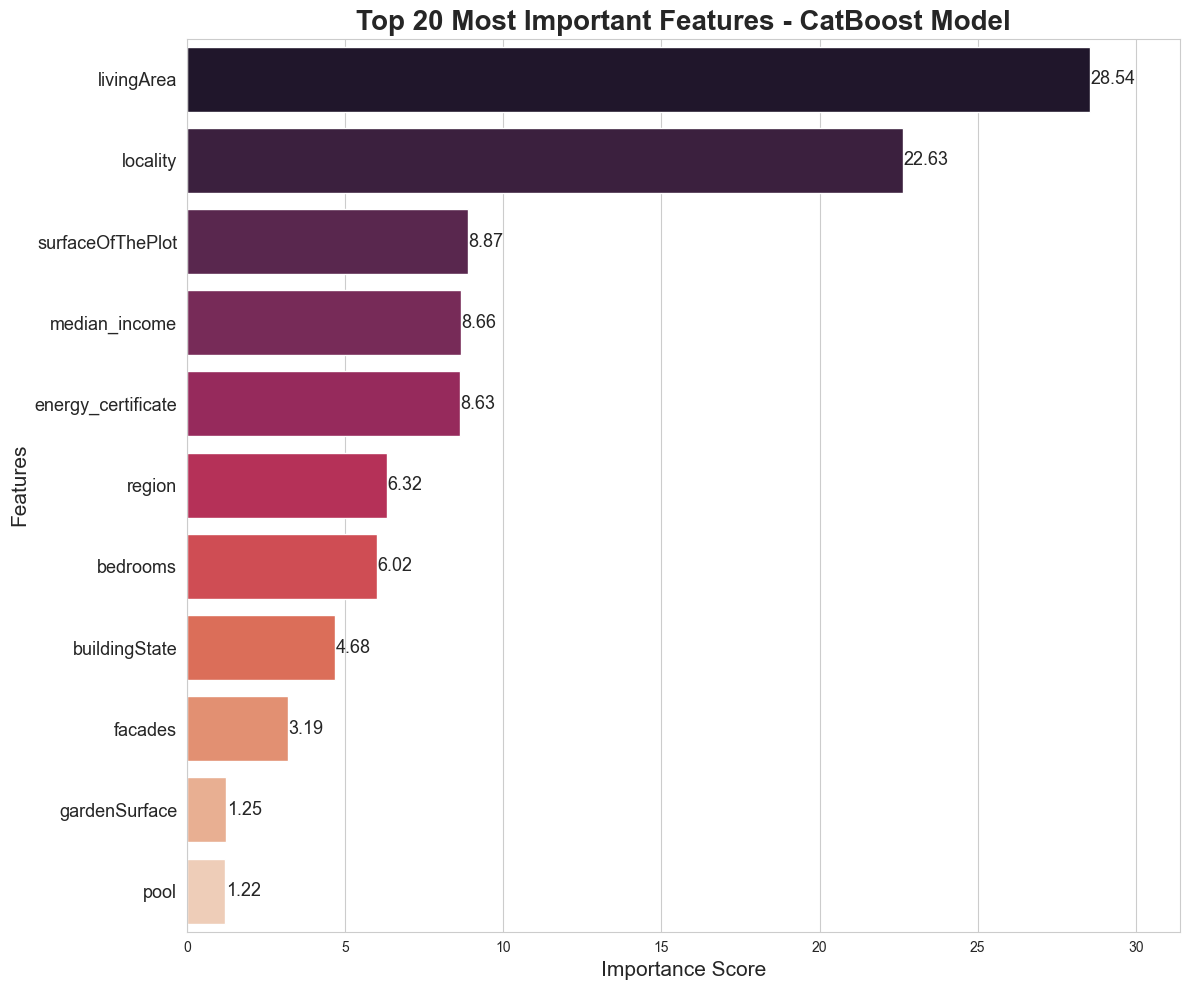

In [219]:
# Average feature importance across all folds
avg_importance = np.mean(feature_importances, axis=0)
 
# Convert to DataFrame
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
 
# Sort and take the top 20 features
top_features = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)
 
# Set the style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("rocket", len(top_features))
 
# Create the plot
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='Importance', y='Feature', data=top_features, palette=palette)
 
# Customize the plot
plt.title('Top 20 Most Important Features - CatBoost Model', fontsize=20, fontweight='bold')
plt.xlabel('Importance Score', fontsize=15)
plt.ylabel('Features', fontsize=15)
 
# Add value labels to the end of each bar
for i, v in enumerate(top_features['Importance']):
    ax.text(v + 0.01, i, f'{v:.2f}', va='center', fontsize=13)
 
# Extend x-axis by 10% and feature names font size
plt.xlim(0, max(top_features['Importance']) * 1.1)
plt.yticks(fontsize=13)
 
# Adjust layout and display
plt.tight_layout()
plt.show()

In [489]:
#Make predictions
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

#Evaluate Mean Square Root (MSE)
rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print(model.score)
print(f"Root Mean Squared Error: {rmse:.2f}, Mean Square Error: {mse:.2f}" )

<bound method CatBoostRegressor.score of <catboost.core.CatBoostRegressor object at 0x14159f980>>
Root Mean Squared Error: 89250.99, Mean Square Error: 7965738367.02


In [ ]:
validation_pool = Pool(y_pred, y_test)
metrics = model.eval_metrics(data=validation_pool, metrics=['R2', 'RMSE', 'MAE'])
print(metrics)

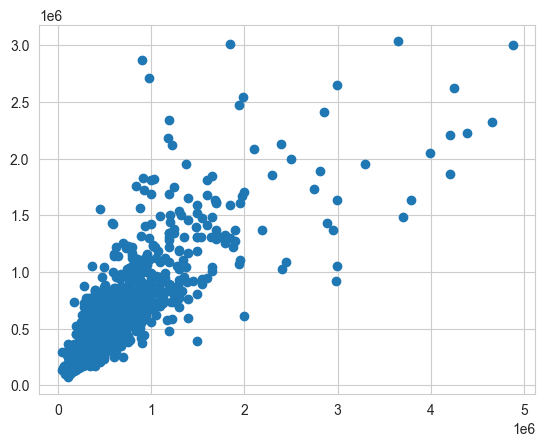

In [80]:
plt.scatter(y_test, y_pred)

plt.show()

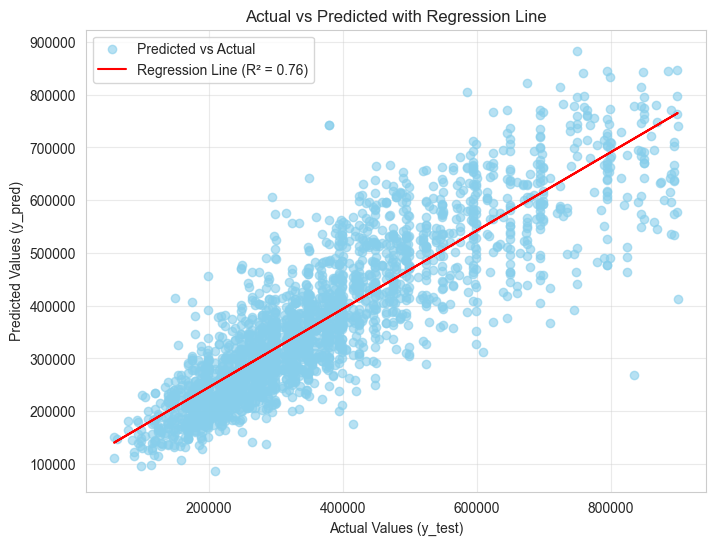

In [220]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="skyblue", label="Predicted vs Actual")

# Calculate regression line
slope, intercept, r_value, p_value, std_err = linregress(y_test, y_pred)
regression_line = slope * np.array(y_test) + intercept

# Plot regression line
plt.plot(y_test, regression_line, color="red", label=f"Regression Line (R² = {r_value**2:.2f})")

#
#labels, title, and legend
plt.title("Actual vs Predicted with Regression Line")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.legend()
plt.grid(alpha=0.4)
plt.show()


In [312]:
df.price.max()

4875000.0

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,mean_squared_log_error, r2_score, f1_score

In [ ]:
import sklearn
from sklearn import metrics
#from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,mean_squared_log_error, r2_score, f1_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mae_test = metrics.mean_absolute_error(y_test, y_pred)
msle = metrics.mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Compare Training & Test data
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#R2 train & test comparission
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_pred)

#Print Scores
print(f"Test RMSE: {rmse}, Test R2: {r2}, Test MSE: {mse}, TEST MAE: {mae_test}, Test MSLE: {msle}")
print(f"Training MAE: {mae_train}, Test RMSE: {mae_test}")
print(f"Training RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Training R²: {train_r2}, Test R²: {test_r2}")



Test RMSE: 86239.43452698627, Test R2: 0.7553492965477125, Test MSE: 7437240067.534351, TEST MAE: 61968.83414788894, Test MSLE: 0.051066842376864104
Training MAE: 52770.574099472586, Test RMSE: 61968.83414788894
Training RMSE: 72588.5098993571, Test RMSE: 86239.43452698627
Training R²: 0.8257946522493025, Test R²: 0.7553492965477125


'f1 = f1_score(y_test, y_pred)\nprint("F1 Score:", f1)\n'

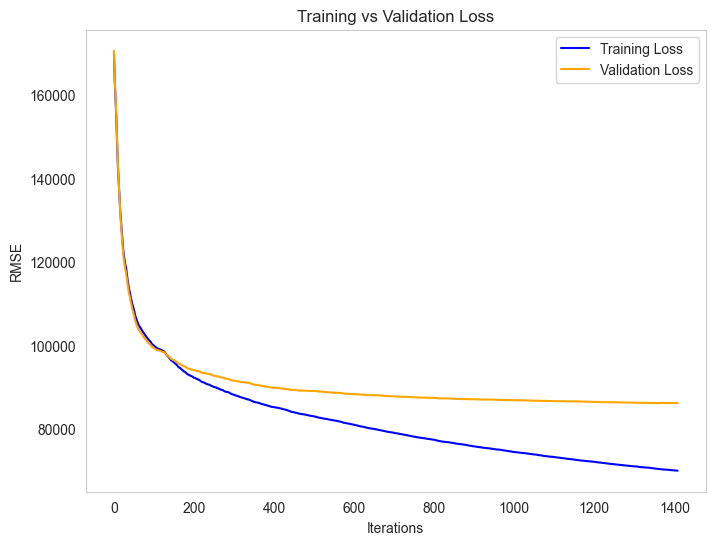

In [222]:
# Extract loss values
loss = model.evals_result_
train_loss = loss['learn']['RMSE']
test_loss = loss['validation']['RMSE']

# Plot training vs validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label="Training Loss", color="blue")
plt.plot(test_loss, label="Validation Loss", color="orange")
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()
plt.show()


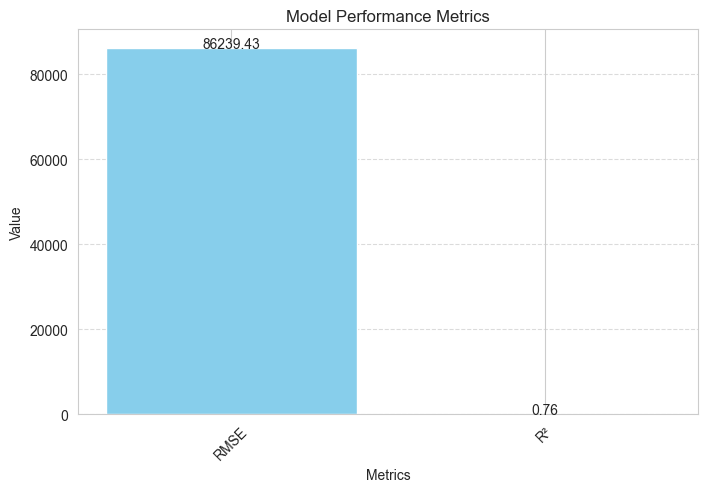

In [406]:


# Metrics calculated earlier
metrics = {
    "RMSE": rmse,
    #"MSE": mse,
    #"MAE": mae,
   
    "R²": r2
}

# Prepare data
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Plot
plt.figure(figsize=(8, 5))
plt.bar(metric_names, metric_values, color='skyblue')
plt.title("Model Performance Metrics")
plt.ylabel("Value")
plt.xlabel("Metrics")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate values on bars
for i, v in enumerate(metric_values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center", fontsize=10)

plt.show()


In [775]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from catboost import CatBoostRegressor
import time

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    """
    Evaluate a CatBoost model and return RMSE, MAE, and R2 scores.
    """
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

# Function to train and evaluate with different hyperparameters
def train_with_catboost(hyperparameters, X_train, X_test, y_train, y_test):
    """
    Train CatBoost with different hyperparameters and return results for analysis.
    """
    results = []  # To store results for analysis
    
    keys = hyperparameters.keys()
    total_combinations = 1
    for key in keys:
        total_combinations *= len(hyperparameters[key])
    
    print(f"Total combinations to test: {total_combinations}")
    combination_counter = 0

    for depth in hyperparameters.get("depth", [6]):  # Default depth if not provided
        for learning_rate in hyperparameters.get("learning_rate", [0.1]):
            for iterations in hyperparameters.get("iterations", [500]):
                combination_counter += 1
                print(f"\nTesting combination {combination_counter}/{total_combinations}")
                print(f"Depth: {depth}, Learning Rate: {learning_rate}, Iterations: {iterations}")
                
                # Initialize the CatBoostRegressor with current hyperparameters
                model = CatBoostRegressor(
                    depth=depth,
                    learning_rate=learning_rate,
                    iterations=iterations,
                    cat_features=categorical_feature_indices,  # Use your categorical features here
                    verbose=0
                )
                
                # Train the model
                start_time = time.time()
                model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=500)
                end_time = time.time()
                
                # Evaluate the model
                metrics = evaluate_model(model, X_test, y_test)
                metrics["Training Time (s)"] = end_time - start_time
                
                # Append hyperparameters and metrics to results
                results.append({
                    "Depth": depth,
                    "Learning Rate": learning_rate,
                    "Iterations": iterations,
                    **metrics
                })
    
    # Create a DataFrame for analysis
    results_df = pd.DataFrame(results)
    return results_df

# Example usage
hyperparameters = {
    "depth": [4, 6, 8,10,12,15,20,25,30,60],
    "learning_rate": [0.05, 0.1, 0.15, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 1],
    "iterations": [10, 50,100,500, 1000,2500, 5000, 6500, 7500, 10000]
}

results_df = train_with_catboost(hyperparameters, X_train, X_test, y_train, y_test)

# Display results sorted by RMSE
print(results_df.sort_values(by="RMSE", ascending=True))


Total combinations to test: 1000

Testing combination 1/1000
Depth: 4, Learning Rate: 0.05, Iterations: 10
0:	learn: 0.6030520	test: 0.5926559	best: 0.5926559 (0)	total: 1.69ms	remaining: 15.3ms
9:	learn: 0.5209972	test: 0.5135939	best: 0.5135939 (9)	total: 17.6ms	remaining: 0us

bestTest = 0.5135938854
bestIteration = 9


Testing combination 2/1000
Depth: 4, Learning Rate: 0.05, Iterations: 50
0:	learn: 0.6030520	test: 0.5926559	best: 0.5926559 (0)	total: 1.43ms	remaining: 70.1ms
49:	learn: 0.3929529	test: 0.3898289	best: 0.3898289 (49)	total: 79.3ms	remaining: 0us

bestTest = 0.3898288515
bestIteration = 49


Testing combination 3/1000
Depth: 4, Learning Rate: 0.05, Iterations: 100
0:	learn: 0.6030520	test: 0.5926559	best: 0.5926559 (0)	total: 1.34ms	remaining: 132ms
99:	learn: 0.3569964	test: 0.3555825	best: 0.3555825 (99)	total: 136ms	remaining: 0us

bestTest = 0.3555824556
bestIteration = 99


Testing combination 4/1000
Depth: 4, Learning Rate: 0.05, Iterations: 500
0:	learn: 0.60

KeyboardInterrupt: 